In [1]:
import pandas as pd 

In [2]:
#from google.colab import files
#data_to_load = files.upload()

In [3]:

# Creation de la base de données de travail
data = pd.read_csv('pr_10k.csv', sep =";")
base = pd.DataFrame(data, columns=['review', 'sentiment'])
base

,review,sentiment
0,Very soft and comfortable and warmer than it l...,positive
1,This is a product well worth the purchase. I ...,positive
2,All of my kids have cried non-stop when I trie...,positive
3,"When the Binky Fairy came to our house, we did...",positive
4,"Lovely book, it's bound tightly so you may not...",positive
...,...,...
9994,The price is right and shipping is fast. I lo...,positive
9995,I really enjoy being able to have a wipe warme...,positive
9996,I bought these as replacements for the pad whi...,positive
9997,"This work awesome, been using them in my warme...",positive


In [4]:
import numpy as np
import matplotlib.pyplot as plot
import re  
import nltk 
import pandas as pd
from nltk.corpus import stopwords
import nltk.stem 
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### **` Definition des Fonction de traitement des données de la colonne "review"`**

In [5]:
##algorithme de pré-traitement test(supprimer les caractères spéciaux, espaces indesirables, etc. convertir les majuscules en miniscule...)
def clean_data(data):
    data = str(data).lower()
    data = re.sub(r"@\s+", r'', data)
    data = re.sub("\s+", ' ', data, flags=re.I)
    data = re.sub("\n", ' ', data)
    letters = re.sub("[^a-zA-Z]", " ", data)
    return letters

In [6]:
#algorithme de traitement des stopword ou mots vides n'ayant pas de réelle signification et généralement courants
def stops_words(words):
    filter_words = []
    for w in words:
        if w not in stop_words:
            filter_words.append(w)
    return filter_words 

### `**Nettoyage des données**`

In [7]:
# nettoyer les donnees
base['review'] = base['review'].apply(lambda x: clean_data(x))   
base['review'] = base['review'].apply(lambda x: x.split (" "))
base['review'] = base['review'].apply(lambda x: stops_words(x))


In [8]:
base['review'] = base['review'].apply(lambda x: ' '.join(x))




# `**Construction de la matrice TFIDF**`

In [9]:
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
X = base['review']
y = base['sentiment']
tfidf = TfidfVectorizer(max_features = 5000, ngram_range=(1,2))
x =tfidf.fit_transform(X).toarray()
print(x.shape)
print(x.size)
print("values", x)

(9999, 5000)
49995000
values [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### **Separation des données**

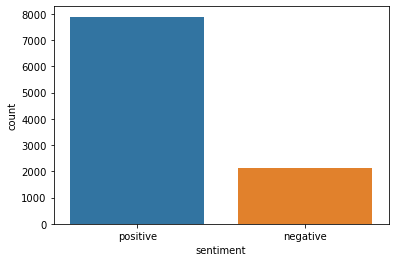

In [10]:
import seaborn as sns
sns.countplot(x='sentiment', data=base)

In [11]:
#séparation des données( Répartition naïve, Répartition stratifiée, Streaming splitting,Streaming distribué)
# repartition naive
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6999, 5000), (3000, 5000), (6999,), (3000,))

### **Modèles d'apprentissage: SVM, Random Forest, Naives Bayes**

In [12]:
# methode d'appentissage SVM(svm classifier, kernel = linear)
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
clf1= LinearSVC()
clf1.fit(X_train, y_train)

LinearSVC()

In [13]:
# methode d'appentissage avec 'Random Forest'
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
#  methode d'appentissage avec 'naive_bayes.MultinomialNB()'
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

# **Evaluation des modèles**

In [15]:
#comparaison de performance avec les méthodes "accuracy, precision, recall, f-mesure"
# SVM(svm classifier, kernel = linear)
y_pred_SVC = clf1.predict(X_test)
print(classification_report(y_test, y_pred_SVC))
print(confusion_matrix(y_test ,y_pred_SVC))
print(accuracy_score(y_test, y_pred_SVC))


              precision    recall  f1-score   support

    negative       0.81      0.64      0.72       646
    positive       0.91      0.96      0.93      2354

    accuracy                           0.89      3000
   macro avg       0.86      0.80      0.82      3000
weighted avg       0.89      0.89      0.89      3000

[[ 415  231]
 [  96 2258]]
0.891


In [16]:
# comparaison des performances avec "accuracy, precision, recall, f-mesure"
# RandomForestClassifier
y_pred_RFC = text_classifier.predict(X_test)
print(confusion_matrix(y_test ,y_pred_RFC))  
print(classification_report(y_test, y_pred_RFC))  
print(accuracy_score(y_test, y_pred_RFC))

[[ 235  411]
 [  41 2313]]
              precision    recall  f1-score   support

    negative       0.85      0.36      0.51       646
    positive       0.85      0.98      0.91      2354

    accuracy                           0.85      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.85      0.85      0.82      3000

0.8493333333333334


In [17]:
# comparaison des performances avec "accuracy, precision, recall, f-mesure"
# naive_bayes.MultinomialNB
y_pred_NBM = clf.predict(X_test)
print(confusion_matrix(y_test ,y_pred_NBM))  
print(classification_report(y_test, y_pred_NBM))  
print(accuracy_score(y_test, y_pred_NBM))

[[ 153  493]
 [   7 2347]]
              precision    recall  f1-score   support

    negative       0.96      0.24      0.38       646
    positive       0.83      1.00      0.90      2354

    accuracy                           0.83      3000
   macro avg       0.89      0.62      0.64      3000
weighted avg       0.85      0.83      0.79      3000

0.8333333333333334


de façon générale, le SVM classifierest celui qui predit le mieux le modèle (89%) suivi du random Forest classifier(85%). pour l'ensemble des modèles les avis positifs sont les mieux prédits (car ils representent plus de 78% )
cependant la precision des individus bien classés par modalité est meilleure  dans la classification multinomiale 